# CUSTOMER CHURN IN TELECOMUNICATION

<img src="https://media.licdn.com/dms/image/C5612AQH0DqxxGFkCvQ/article-cover_image-shrink_720_1280/0/1626825664542?e=1715212800&v=beta&t=-3wL6onvoFSlGgxRkn8ZH5rXP5_e-Jb5HQR1rjsk1QA" alt="churn" width="1000" height="300">


**Author**<br>
Kennedy Owino


## Business Problem
---
Telecommunications companies face significant financial losses due to customer churn, wherein customers discontinue their services prematurely. Identifying and predicting customer churn is crucial for mitigating revenue loss, retaining valuable customers, and optimizing marketing strategies. However, without a comprehensive understanding of the underlying patterns and factors contributing to churn, businesses struggle to implement effective retention measures.
Therefore, the business problem of this revolves around the imperative need to identify and predict customer churn accurately.

## Business Understanding
---
In the competitive landscape of telecommunications, customer retention is paramount for sustained profitability and market growth. The ability to predict and prevent customer churn requires a deep understanding of customer behavior, preferences, and dissatisfaction triggers. By leveraging advanced data analytics and machine learning techniques, businesses can uncover actionable insights from vast amounts of customer data to identify at-risk customers and tailor retention strategies accordingly.<br>

### Key Objectives

$i.$ Develop a predictive model to identify customers at risk of churn based on historical data and relevant features.<br>
$ii.$ Identify significant factors influencing customer churn, including service usage patterns, demographics, contract terms, and customer interactions.<br>

$iii.$ Provide actionable insights to decision-makers for proactive churn management and resource allocation.

### Key Stakeholders
$1.$ **Telecom Executives:** Senior management and decision-makers responsible for devising strategic initiatives to improve customer retention and maximize revenue.<br>

$2.$ **Marketing and Sales Teams:** Teams responsible for implementing customer acquisition and retention campaigns, leveraging insights generated by the predictive model to tailor marketing strategies.<br>

$3.$ **Customer Service Representatives:** Frontline staff tasked with addressing customer concerns and enhancing customer satisfaction to reduce churn rates.<br>

$4.$ **Customers:** Ultimately, the end-users whose experiences and interactions drive churn behavior, and who stand to benefit from improved service offerings and personalized retention efforts.



## Data Understanding
---
The dataset utilized in this project is sourced from SyriaTel published on [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset), encompassing comprehensive customer information. It includes data on customers' state of residence, telephone numbers, and account duration. Additionally, the dataset features columns specifying whether customers have an international plan and voicemail plan, along with details on the number of voicemails received. Furthermore, it encompasses data on the duration of calls, the frequency of calls made, and the corresponding charges incurred during the day, evening, and night periods.

## Exploratory Data Analysis
---

In [4]:
#importing necessary packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocesing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


#model packages
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import log_loss




import warnings
warnings.filterwarnings(action= 'ignore', category= FutureWarning)

In [5]:
#importing the dataset
filepath = 'data/syriateldataset.csv'
data = pd.read_csv(filepath)

#viewing the first 5 rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#viewing the shape
data.shape

(3333, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the information above, there are no missing values in the dataset.

In [8]:
#dropping the phone number and area code

data.drop(columns=['phone number', 'area code'], inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [10]:
#partioning the data into categorical and numerical variables
categorical_data = data.select_dtypes('object')

numerical_data = data.select_dtypes('number')


In [11]:
#checking the descriptive statistics for numerical data

numerical_data.describe().T


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total night calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [12]:
numerical_data.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

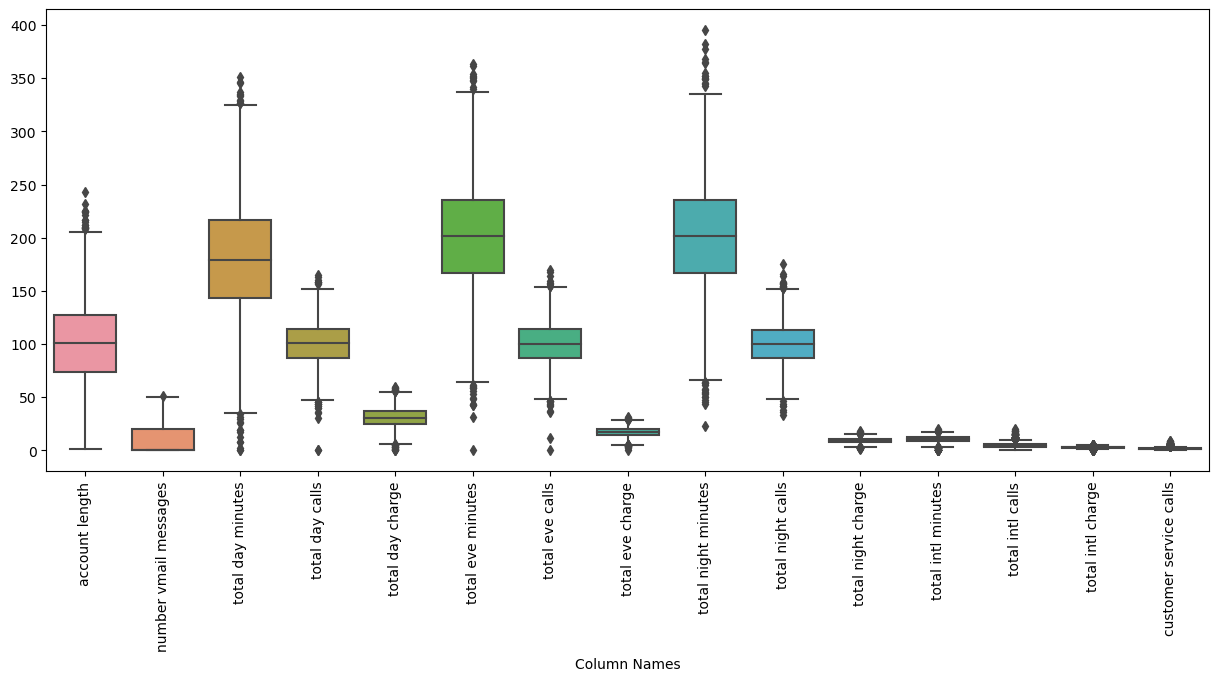

In [13]:
#plotting the box plots for each column to understand the distribution of the data 
#and any outlier influence

fig, ax = plt.subplots(figsize = (15, 6))

#create a boxplot of columns
sns.boxplot(numerical_data)

# Set the x-axis tick labels
ax.set_xticklabels(numerical_data.columns, rotation= 90)

# Set the x-axis label
ax.set_xlabel('Column Names');



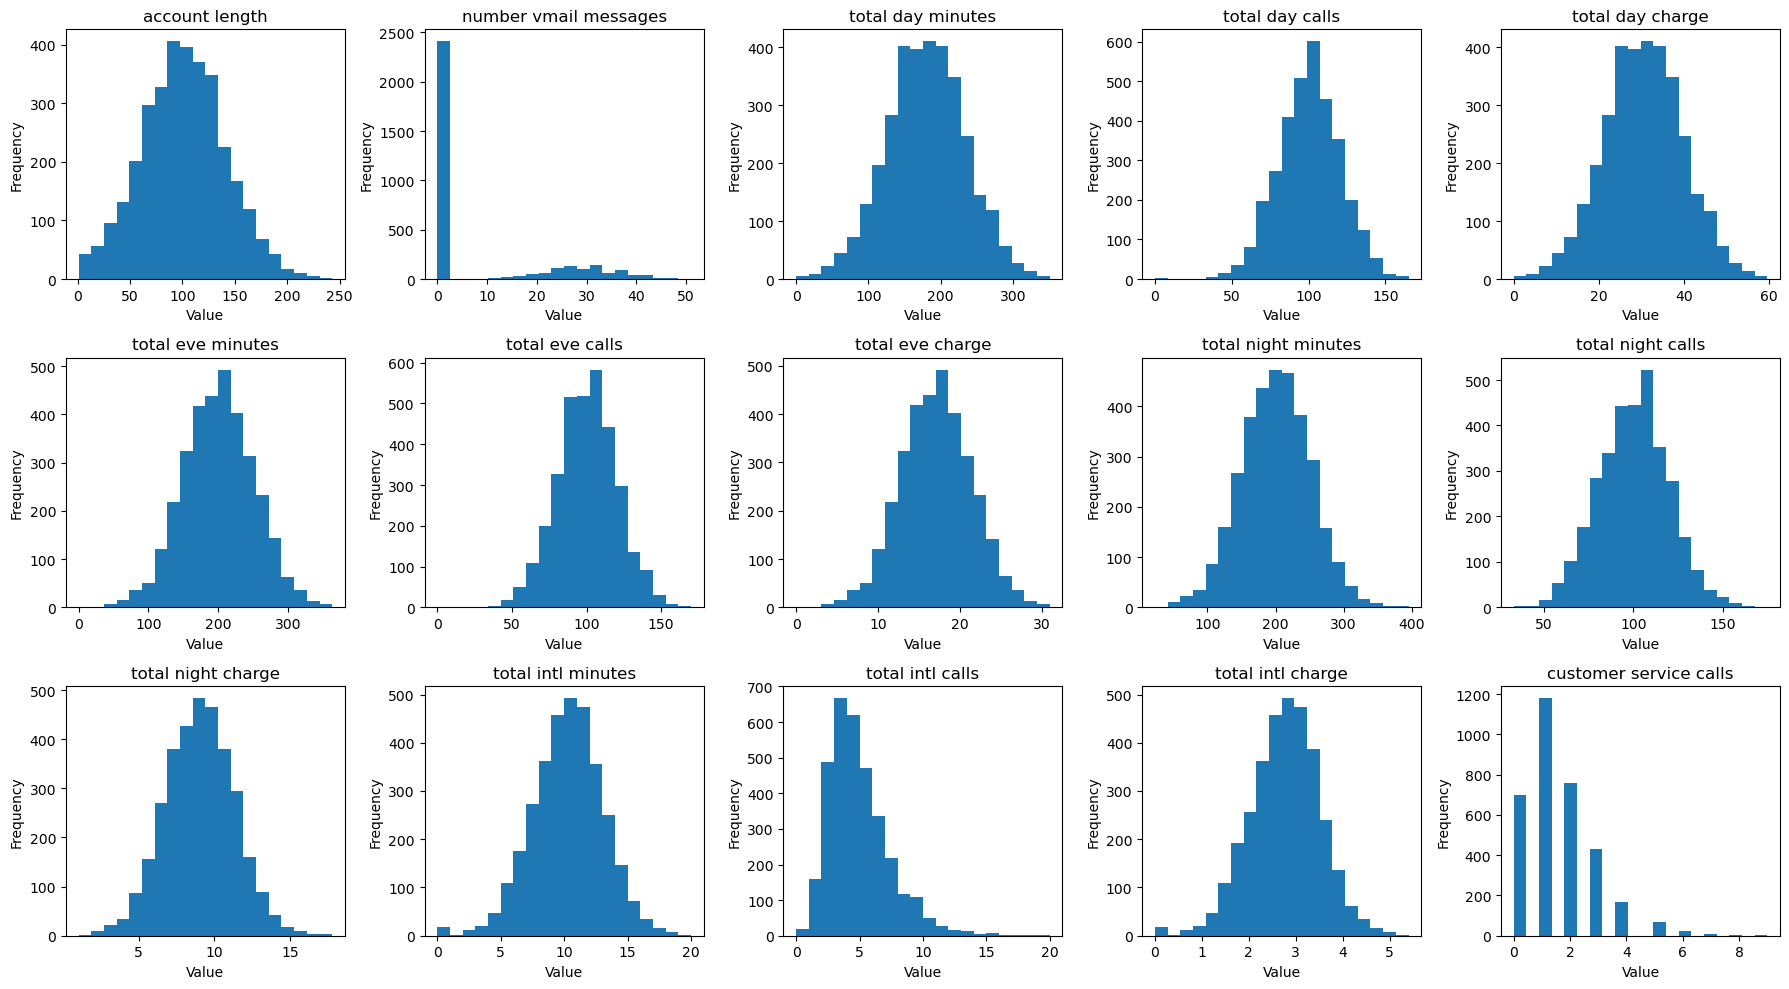

In [14]:
#Plotting histograms of the features to understand their distribution
fig, axs = plt.subplots(ncols=5,nrows=3, figsize=(18, 10))

for i, col in enumerate(numerical_data.columns):
    ax = axs[i // 5, i % 5]
    ax.hist(numerical_data[col], bins=20)  
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

Based on the boxplots and histogram plots generated for the dataset above, it's observed that the majority of features exhibit approximately normal distributions with minimal presence of outliers. However, a notable exception is the `number of vmail messages` feature, which displays approximately negatively skewed distribution.


In [15]:
#checking the categorical features

categorical_data.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


Text(0, 0.5, 'Count')

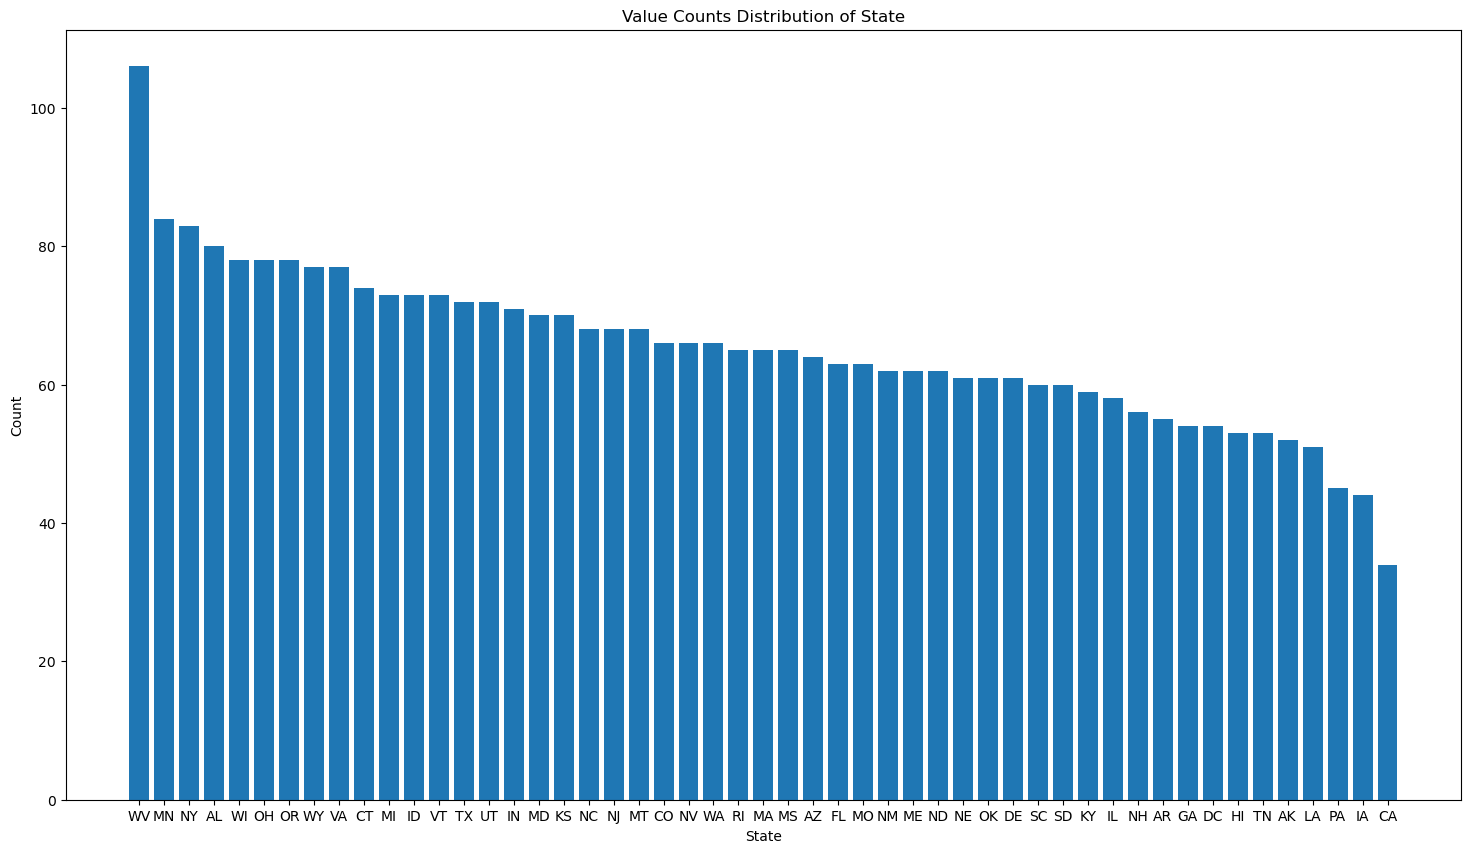

In [16]:
#ploting the distribution of states
fig, ax = plt.subplots(figsize= (18, 10))
#assigning state names to x and their values to y
x = categorical_data['state'].value_counts().index
y = categorical_data['state'].value_counts().values

#ploting the results
ax.bar(x, y)
ax.set_title('Value Counts Distribution of State')
ax.set_xlabel('State')
ax.set_ylabel('Count')


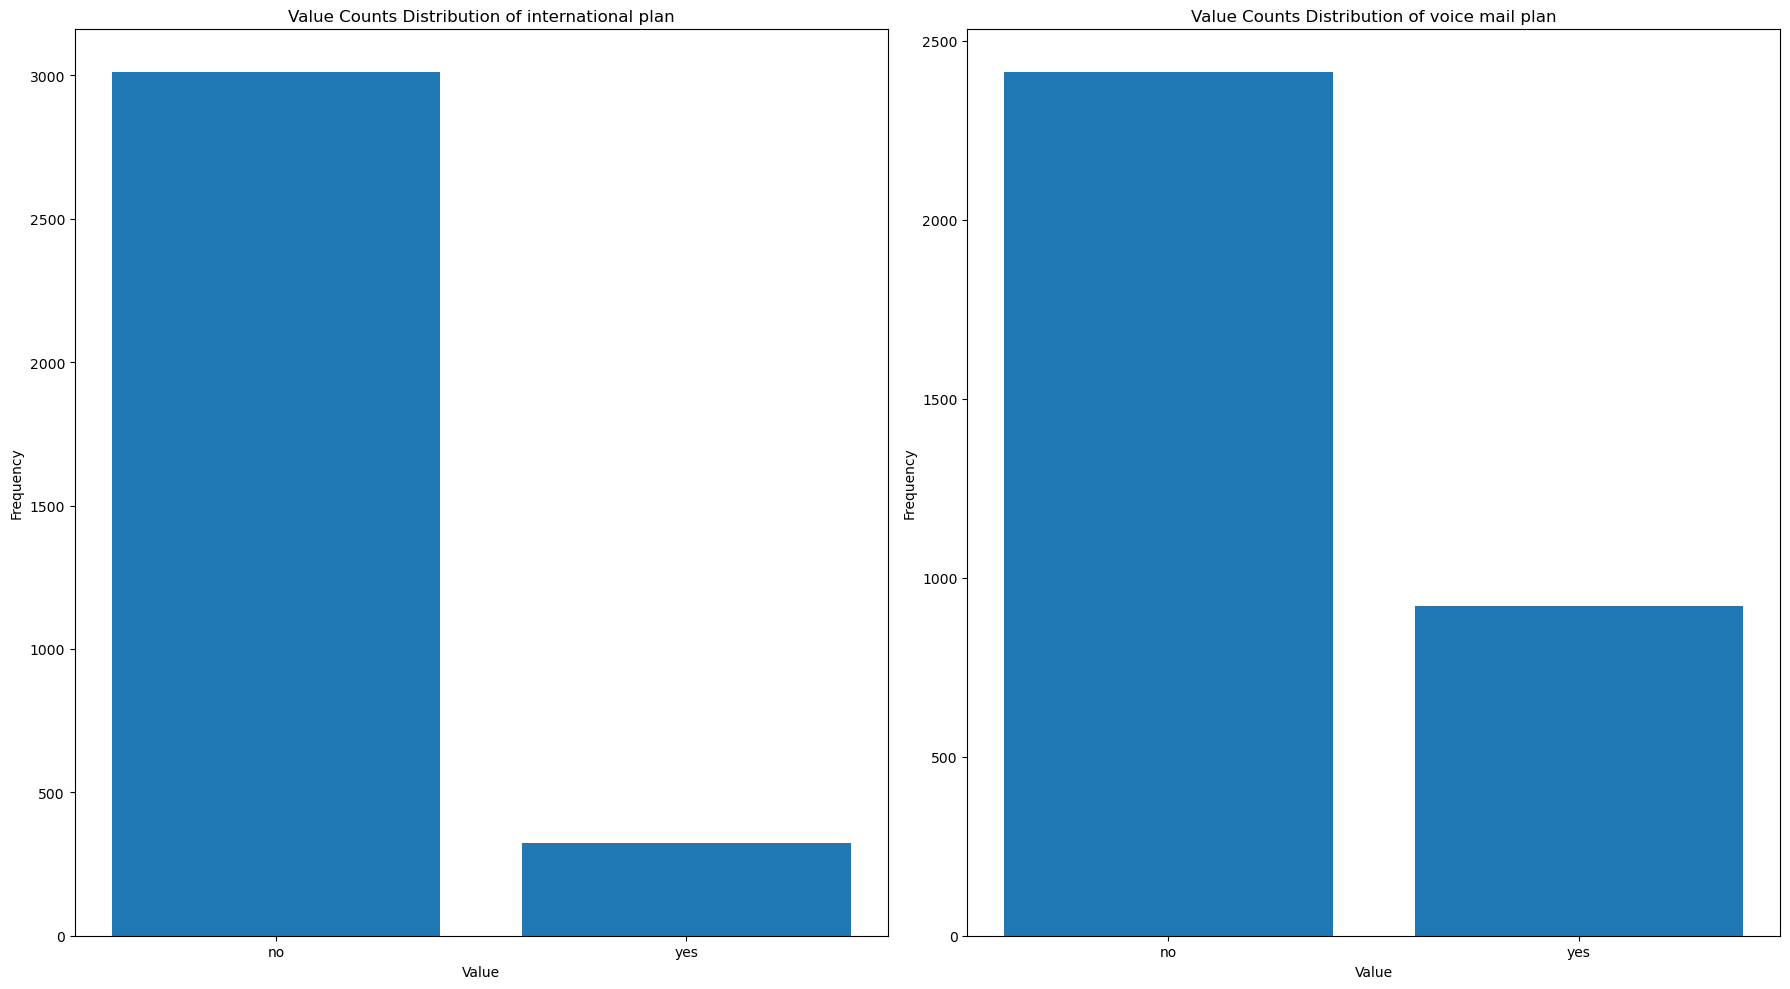

In [17]:
#ploting the class weight for the remaining categorical features

fig, axs = plt.subplots(ncols=2, figsize=(18, 10))

for i, col in enumerate(categorical_data.columns.difference(['state'])):

    ##assigning class to x and their values to y

    x = categorical_data[col].value_counts().index
    y = categorical_data[col].value_counts().values

    ax = axs[i]

    ax.bar(x, y)
    #set title and label axes
    ax.set_title(f'Value Counts Distribution of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()
    


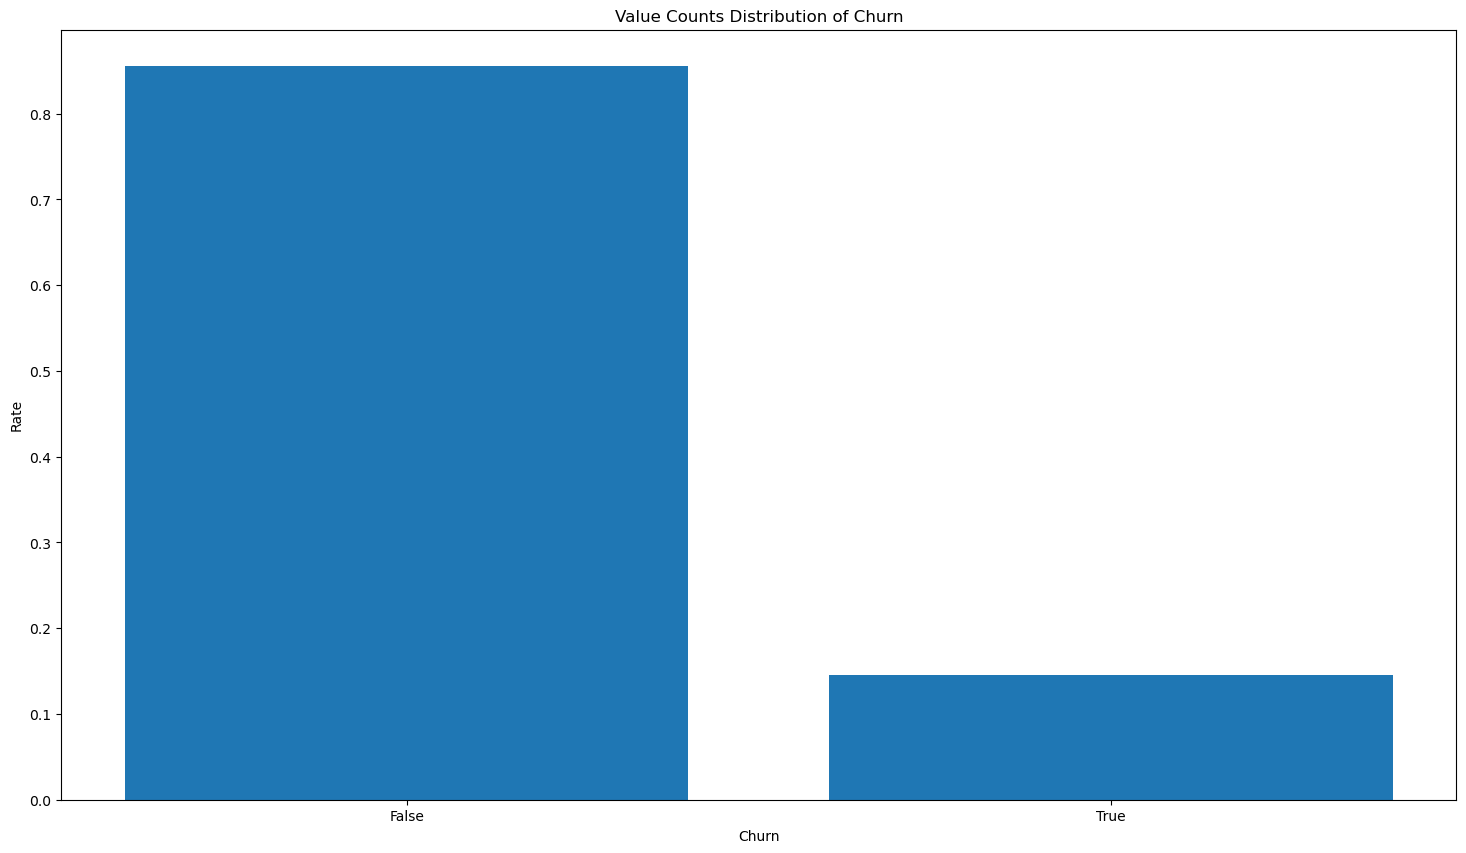

In [18]:
#checking the churn rate
fig, ax = plt.subplots(figsize=(18, 10))

x = data['churn'].value_counts().index
y = data['churn'].value_counts(normalize= True).values

# Plotting the results
ax.bar(x, y)
ax.set_title('Value Counts Distribution of Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Rate')

# Set the tick positions and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(x)

plt.show()


## Data Preprocessing

In [19]:
#partioning the data into target and features
#target
y = data['churn'].astype(int)
#features
X = data[data.columns.difference(['churn'])]

X.head()

,account length,customer service calls,international plan,number vmail messages,state,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes,voice mail plan
0,128,1,no,25,KS,110,45.07,265.1,99,16.78,197.4,3,2.70,10.0,91,11.01,244.7,yes
1,107,1,no,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
2,137,0,no,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
3,84,2,yes,0,OH,71,50.90,299.4,88,5.26,61.9,7,1.78,6.6,89,8.86,196.9,no
4,75,3,yes,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no


In [20]:
#spliting the data to train and test samples
#setting seed for reproducibility
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= seed)

In [21]:
categorical_cols = ['state','international plan', 'voice mail plan']

numerical_cols = X_train.columns.difference(categorical_cols)

In [22]:
#first 3 rows of X_train
X_train.head(3)

,account length,customer service calls,international plan,number vmail messages,state,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes,voice mail plan
367,45,1,no,0,MD,127,13.29,78.2,108,21.54,253.4,3,4.86,18.0,100,11.48,255.0,no
3103,115,2,no,0,DE,111,33.30,195.9,108,19.30,227.0,1,3.56,13.2,113,14.09,313.2,no
549,121,4,no,31,OK,63,40.31,237.1,117,17.48,205.6,5,2.73,10.1,85,8.85,196.7,yes
